## 01.기본정보
- 기준년월 / ID / 남녀구분코드 / 연령 / LifeStage

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [3]:
import pandas as pd

# 분석에 필요한 컬럼만 지정
usecols = ['Segment', 'ID', '기준년월', '남녀구분코드', '연령', 'Life_Stage']

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/1.회원정보/train_회원정보.csv", usecols=usecols)

print(df.head())

     기준년월            ID  남녀구분코드   연령 Segment Life_Stage
0  201807  TRAIN_000000       2  40대       D    자녀성장(2)
1  201807  TRAIN_000001       1  30대       E    자녀성장(1)
2  201807  TRAIN_000002       1  30대       C      자녀출산기
3  201807  TRAIN_000003       2  40대       D    자녀성장(2)
4  201807  TRAIN_000004       2  40대       E    자녀성장(1)


In [4]:
# 문자열 연령 → 숫자형 연령으로 변환
df["연령_숫자"] = df["연령"].str.extract(r"(\d+)").astype(float)

# 확인
print(df["연령_숫자"].head())

0    40.0
1    30.0
2    30.0
3    40.0
4    40.0
Name: 연령_숫자, dtype: float64


Segment
A    46.481481
B    39.583333
C    41.462027
D    39.799852
E    41.668092
Name: 연령_숫자, dtype: float64


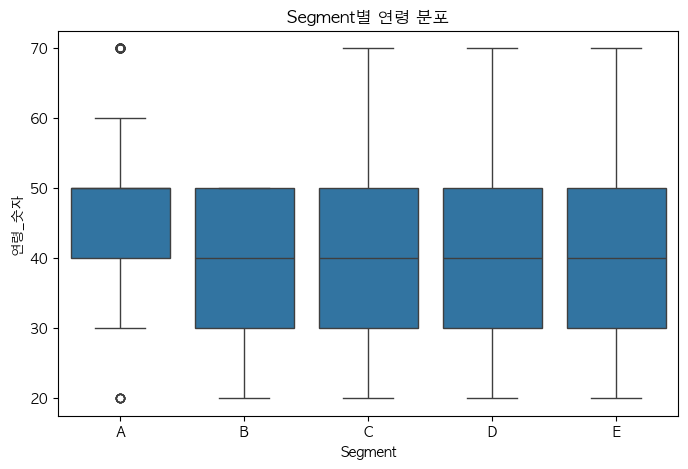

In [5]:
# 연령 평균
print(df.groupby("Segment")["연령_숫자"].mean())

# 박스플롯 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x="Segment", y="연령_숫자", data=df, order=['A', 'B', 'C', 'D', 'E'])
plt.title("Segment별 연령 분포")
plt.show()

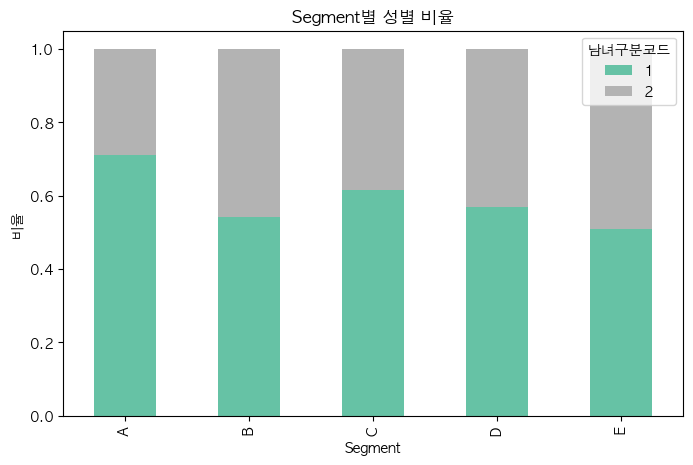

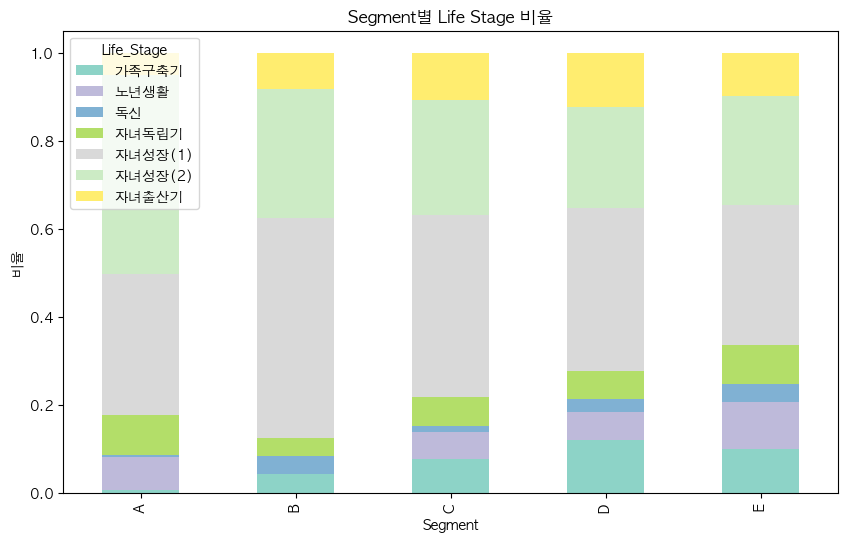

In [6]:
# 성별 비율
gender_crosstab = pd.crosstab(df["Segment"], df["남녀구분코드"], normalize="index")
gender_crosstab.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set2")
plt.title("Segment별 성별 비율")
plt.ylabel("비율")
plt.show()

# Life_Stage 비율
stage_crosstab = pd.crosstab(df["Segment"], df["Life_Stage"], normalize="index")
stage_crosstab.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set3")
plt.title("Segment별 Life Stage 비율")
plt.ylabel("비율")
plt.show()

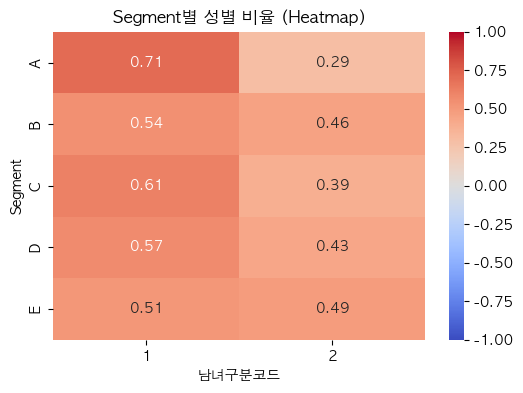

In [7]:
import seaborn as sns

# 성별 비율 히트맵
plt.figure(figsize=(6, 4))
sns.heatmap(gender_crosstab, annot=True, cmap="coolwarm", fmt=".2f", vmax=1, vmin=-1)
plt.title("Segment별 성별 비율 (Heatmap)")
plt.show()

- A: 남성 비율(70%)이 압도적이고, 평균연령이 46.5세로 제일 높음

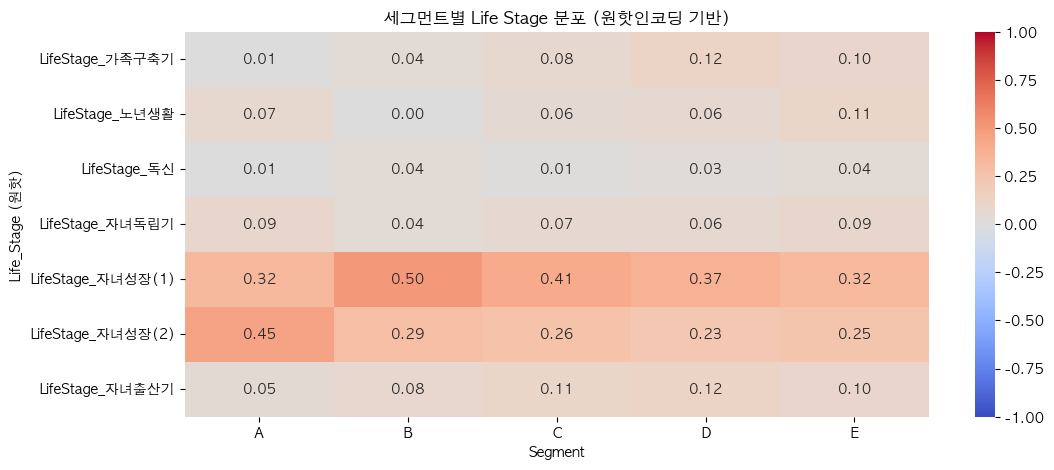

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Life_Stage 원핫 인코딩
life_stage_dummies = pd.get_dummies(df["Life_Stage"], prefix="LifeStage")

# 2. 인코딩한 컬럼과 Segment 컬럼 병합
df_encoded = pd.concat([df["Segment"], life_stage_dummies], axis=1)

# 3. 피벗 테이블로 세그먼트별 평균값 (= 각 Life_Stage 비율)
pivot_table = df_encoded.groupby("Segment").mean()

# 4. 히트맵 시각화
plt.figure(figsize=(12, 5))
sns.heatmap(pivot_table.T, annot=True, cmap="coolwarm", fmt=".2f", vmax=1, vmin=-1)
plt.title("세그먼트별 Life Stage 분포 (원핫인코딩 기반)")
plt.ylabel("Life_Stage (원핫)")
plt.xlabel("Segment")
plt.show()

In [10]:
import pandas as pd
import statsmodels.api as sm

# Segment를 원핫 인코딩
segment_dummies = pd.get_dummies(df["Segment"], prefix="Segment")

# 독립변수 준비 (예: 연령, 성별, 라이프스테이지)
X = pd.get_dummies(df[["연령_숫자", "남녀구분코드", "Life_Stage"]], drop_first=True)
X = sm.add_constant(X)  # 상수항 추가
X = X.astype(float)     # 숫자형 변환

# 각 Segment별로 회귀 분석
for col in segment_dummies.columns:
    print(f"회귀 분석 결과: {col}")
    y = segment_dummies[col].astype(float)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print("\n" + "="*80 + "\n")

회귀 분석 결과: Segment_A
                            OLS Regression Results                            
Dep. Variable:              Segment_A   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     64.74
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          1.04e-106
Time:                        09:17:00   Log-Likelihood:             5.9692e+06
No. Observations:             2400000   AIC:                        -1.194e+07
Df Residuals:                 2399991   BIC:                        -1.194e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           